# NYC TLC Green Taxi Trip Record Data Dictionary

Source: [NYC TLC Trip Record Data](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml)

## Field Descriptions

| Field Name              | Description |
|-------------------------|-------------|
| **VendorID**            | A code indicating the LPEP provider that provided the record. <br> 1 = Creative Mobile Technologies, LLC <br> 2 = Curb Mobility, LLC <br> 6 = Myle Technologies Inc |
| **lpep_pickup_datetime** | The date and time when the meter was engaged. |
| **lpep_dropoff_datetime** | The date and time when the meter was disengaged. |
| **store_and_fwd_flag**  | Indicates whether the trip record was held in vehicle memory before sending to the vendor (store and forward). |
| **RatecodeID**          | The final rate code in effect at the end of the trip. <br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br> 4 = Nassau or Westchester <br> 5 = Negotiated fare <br> 6 = Group ride <br> 99 = Null/unknown |
| **PULocationID**        | TLC Taxi Zone where the meter was engaged. |
| **DOLocationID**        | TLC Taxi Zone where the meter was disengaged. |
| **passenger_count**     | Number of passengers in the vehicle. |
| **trip_distance**       | Distance traveled in miles. |
| **fare_amount**         | Meter-calculated fare based on time and distance. [More Info](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page) |
| **extra**               | Miscellaneous extras and surcharges. |
| **mta_tax**             | MTA tax triggered automatically based on metered rate. |
| **tip_amount**          | Tip amount (credit card only; cash tips not included). |
| **tolls_amount**        | Total tolls paid. |
| **improvement_surcharge** | Fixed fee added at flag drop since 2015. |
| **total_amount**        | Total amount charged to passengers (excluding cash tips). |
| **payment_type**        | How the passenger paid. <br> 0 = Flex Fare trip <br> 1 = Credit card <br> 2 = Cash <br> 3 = No charge <br> 4 = Dispute <br> 5 = Unknown <br> 6 = Voided trip |
| **trip_type**           | How the trip was initiated. <br> 1 = Street-hail <br> 2 = Dispatch |
| **congestion_surcharge** | NYS congestion surcharge collected for the trip. |
| **cbd_congestion_fee**  | Per-trip MTA Congestion Relief Zone charge starting Jan. 5, 2025. |


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
import numpy as np
sns.set_style('darkgrid')
from sklearn.feature_extraction import DictVectorizer

## Import the CSV Data as Pandas DataFrame

In [2]:

january = pd.read_parquet('./data/green_tripdata_2025-01.parquet')
january.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


In [3]:
january.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'cbd_congestion_fee'],
      dtype='object')

In [4]:
february = pd.read_parquet('./data/green_tripdata_2025-02.parquet')
february.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-02-01 00:12:15,2025-02-01 00:15:48,N,1.0,166,41,1.0,0.65,6.5,...,0.5,1.80,0.0,NaN,1.0,10.80,1.0,1.0,0.00,0.00
1,2,2025-01-31 23:57:05,2025-02-01 00:24:24,N,1.0,255,161,1.0,6.57,31.7,...,0.5,0.00,0.0,NaN,1.0,37.70,2.0,1.0,2.75,0.75
2,2,2025-02-01 00:24:26,2025-02-01 00:49:54,N,1.0,75,182,2.0,8.36,36.6,...,0.5,0.00,0.0,NaN,1.0,39.10,2.0,1.0,0.00,0.00
3,1,2025-02-01 00:17:15,2025-02-01 00:25:56,N,1.0,97,209,1.0,2.40,12.8,...,1.5,3.75,0.0,NaN,1.0,22.55,1.0,1.0,2.75,0.75
4,2,2025-02-01 00:17:36,2025-02-01 00:26:36,N,1.0,7,223,1.0,1.31,10.7,...,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,0.00


In [5]:
#### Shape of the dataset
january.shape, february.shape

((48326, 21), (46621, 21))

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### AIM :
### 🎯 Objective

- **Predict trip duration** between two NYC taxi zones.
- Use the fields `lpep_pickup_datetime` and `lpep_dropoff_datetime` to calculate the **trip duration**, which will serve as the **target variable (Y)**.
- Use `PULocationID` (pickup location), `DOLocationID` (drop-off location), and `trip_distance` as the **input features (X)**.

In [6]:
january_distance= january[['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID', 'DOLocationID','trip_distance',
                           "passenger_count","fare_amount","total_amount"
                        
                          ]]

In [7]:


january_distance.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID',
       'DOLocationID', 'trip_distance', 'passenger_count', 'fare_amount',
       'total_amount'],
      dtype='object')

In [8]:
##check missing values
january_distance.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
PULocationID                0
DOLocationID                0
trip_distance               0
passenger_count          1836
fare_amount                 0
total_amount                0
dtype: int64

In [9]:
# Check Null and Dtypes
january_distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48326 entries, 0 to 48325
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   48326 non-null  datetime64[us]
 1   lpep_dropoff_datetime  48326 non-null  datetime64[us]
 2   PULocationID           48326 non-null  int32         
 3   DOLocationID           48326 non-null  int32         
 4   trip_distance          48326 non-null  float64       
 5   passenger_count        46490 non-null  float64       
 6   fare_amount            48326 non-null  float64       
 7   total_amount           48326 non-null  float64       
dtypes: datetime64[us](2), float64(4), int32(2)
memory usage: 2.6 MB


In [10]:
# Calculate trip duration to minutes
january_distance['duration'] = (
    january_distance['lpep_dropoff_datetime'] - january_distance['lpep_pickup_datetime']
).dt.total_seconds() / 60



# Define cat and numerical features
num_features = ["passenger_count", "trip_distance", "fare_amount", "total_amount","duration"]
cat_features = ["PULocationID", "DOLocationID"]


january_distance = january_distance[num_features + cat_features ]

In [11]:
january_distance.describe()

,passenger_count,trip_distance,fare_amount,total_amount,duration,PULocationID,DOLocationID
count,46490.000000,48326.000000,48326.000000,48326.000000,48326.000000,48326.000000,48326.000000
mean,1.278103,21.532410,16.762466,22.634242,19.955195,94.094545,142.409014
std,0.937178,990.646907,13.308342,15.435061,93.924039,54.968061,77.251550
min,0.000000,0.000000,-113.000000,-114.000000,0.000000,3.000000,1.000000
25%,1.000000,1.100000,9.300000,13.705000,7.200000,74.000000,74.000000
50%,1.000000,1.740000,13.500000,18.750000,11.250000,75.000000,140.000000
75%,1.000000,2.940000,19.100000,26.465000,16.983333,97.000000,230.000000
max,9.000000,84731.570000,336.200000,371.400000,1439.650000,265.000000,265.000000


In [12]:
##(98% of time duration is less than 45 minutes and 99% is 62

january_distance.describe(percentiles=[.95, 0.98,.99])

,passenger_count,trip_distance,fare_amount,total_amount,duration,PULocationID,DOLocationID
count,46490.000000,48326.000000,48326.000000,48326.000000,48326.000000,48326.000000,48326.000000
mean,1.278103,21.532410,16.762466,22.634242,19.955195,94.094545,142.409014
std,0.937178,990.646907,13.308342,15.435061,93.924039,54.968061,77.251550
min,0.000000,0.000000,-113.000000,-114.000000,0.000000,3.000000,1.000000
50%,1.000000,1.740000,13.500000,18.750000,11.250000,75.000000,140.000000
95%,3.000000,7.670000,39.400000,50.000000,32.366667,236.000000,262.000000
98%,5.000000,10.990000,55.500000,66.740000,44.983333,253.000000,263.000000
99%,6.000000,14.922500,70.000000,81.000000,61.991667,260.000000,264.000000
max,9.000000,84731.570000,336.200000,371.400000,1439.650000,265.000000,265.000000


In [13]:
##take away ouliers that are outisde the top 99% time duration
january_distance = january_distance[(january_distance.duration >= 0) & (january_distance.duration <= 60)]

In [14]:
##take away ouliers that are outisde the top 99% i.e more than 15 mile
january_distance = january_distance[(january_distance.trip_distance >= 0) & (january_distance.trip_distance <= 15)]
january_distance = january_distance[(january_distance.passenger_count >= 0) & (january_distance.passenger_count <= 5)]

In [15]:
january_distance.head()

,passenger_count,trip_distance,fare_amount,total_amount,duration,PULocationID,DOLocationID
0,1.0,5.93,24.70,34.00,14.183333,75,235
1,1.0,1.32,8.60,11.10,5.883333,166,75
2,1.0,0.41,25.55,26.55,1.866667,171,73
3,1.0,4.12,21.20,36.77,15.466667,74,223
4,1.0,4.71,33.80,46.86,36.083333,66,158


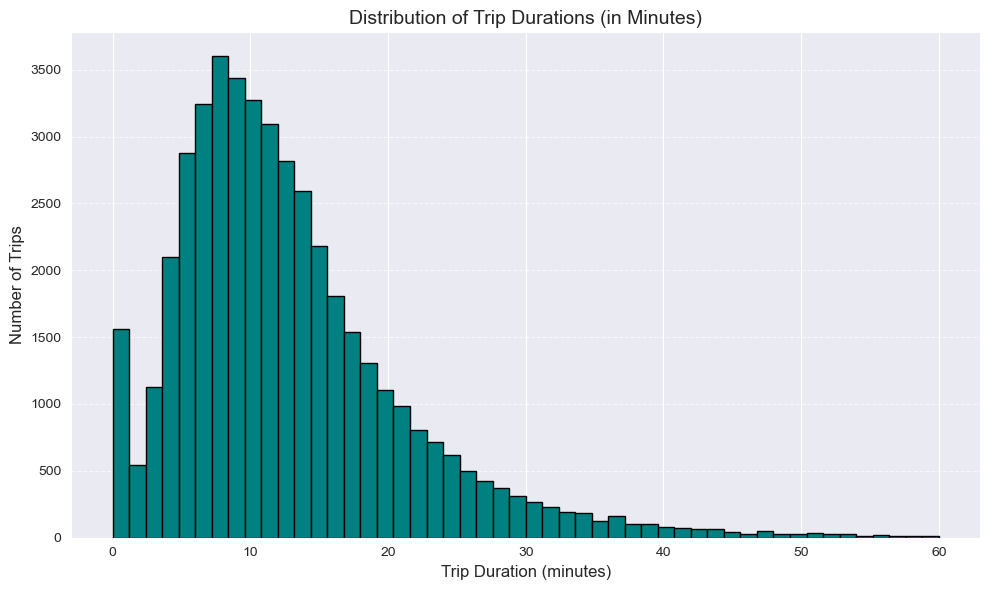

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(january_distance['duration'], bins=50, color='teal', edgecolor='black')

# Add labels and title
plt.title('Distribution of Trip Durations (in Minutes)', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


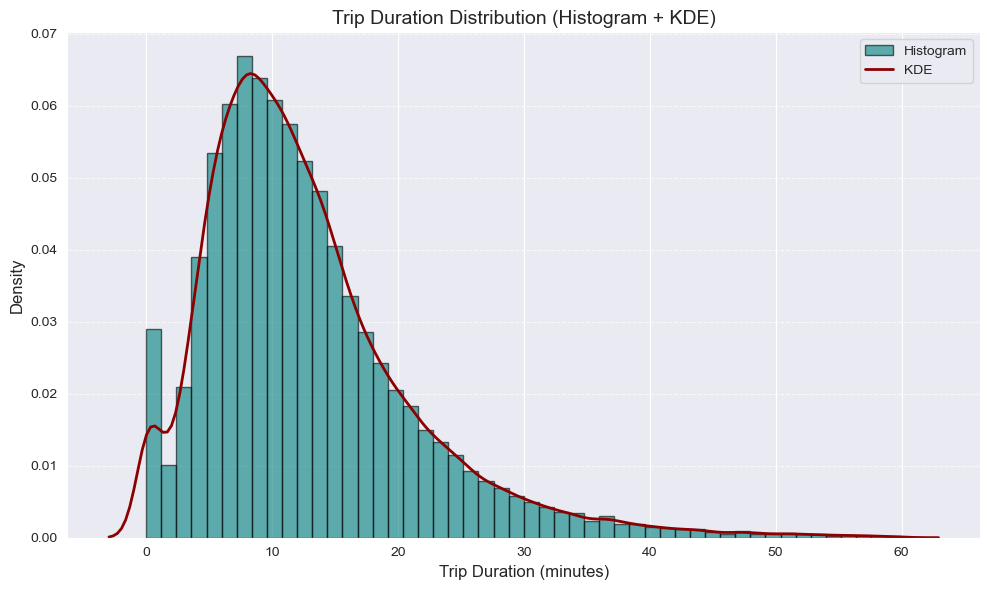

In [17]:
# Create the plot
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(january_distance['duration'], bins=50, color='teal', edgecolor='black', alpha=0.6, density=True, label='Histogram')

# KDE plot
sns.kdeplot(january_distance['duration'], color='darkred', linewidth=2, label='KDE')

# Add labels, title, legend
plt.title('Trip Duration Distribution (Histogram + KDE)', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


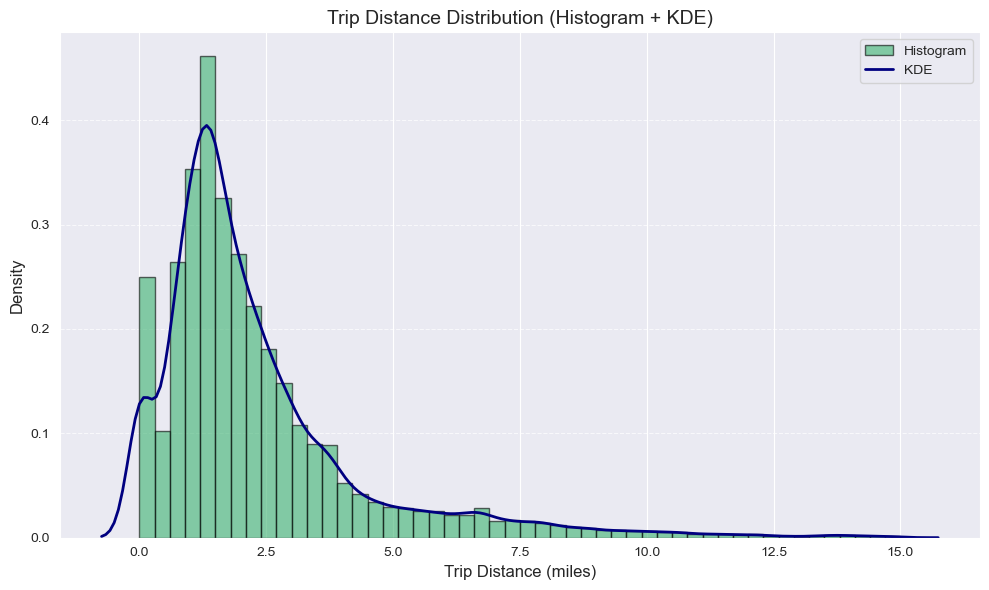

In [18]:
# Create the plot
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(january_distance['trip_distance'], bins=50, color='mediumseagreen', edgecolor='black', alpha=0.6, density=True, label='Histogram')

# KDE plot
sns.kdeplot(january_distance['trip_distance'], color='navy', linewidth=2, label='KDE')

# Labels, title, legend
plt.title('Trip Distance Distribution (Histogram + KDE)', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

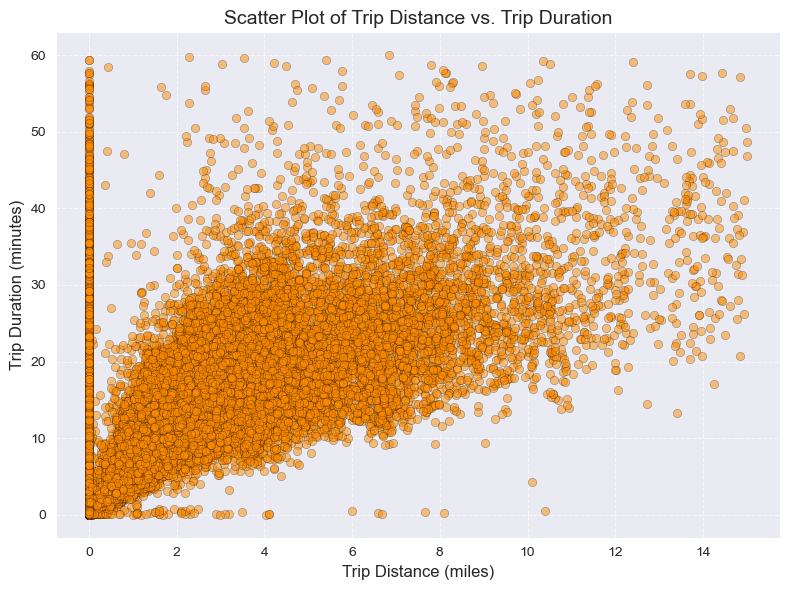

In [19]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(january_distance['trip_distance'], january_distance['duration'], 
            alpha=0.5, color='darkorange', edgecolor='black', linewidth=0.3)

# Labels and title
plt.title('Scatter Plot of Trip Distance vs. Trip Duration', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [20]:
##convert the drop zone to categorical data
january_distance[['PULocationID', 'DOLocationID']] = (
    january_distance[['PULocationID', 'DOLocationID']].astype('str')
)

In [21]:
january_distance.head()

,passenger_count,trip_distance,fare_amount,total_amount,duration,PULocationID,DOLocationID
0,1.0,5.93,24.70,34.00,14.183333,75,235
1,1.0,1.32,8.60,11.10,5.883333,166,75
2,1.0,0.41,25.55,26.55,1.866667,171,73
3,1.0,4.12,21.20,36.77,15.466667,74,223
4,1.0,4.71,33.80,46.86,36.083333,66,158


In [22]:
january_distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44893 entries, 0 to 46489
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  44893 non-null  float64
 1   trip_distance    44893 non-null  float64
 2   fare_amount      44893 non-null  float64
 3   total_amount     44893 non-null  float64
 4   duration         44893 non-null  float64
 5   PULocationID     44893 non-null  object 
 6   DOLocationID     44893 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.7+ MB


In [23]:
def create_test_data(link):
    """
    Load and preprocess test data from parquet file
    
    Parameters:
    link (str): Path to parquet file
    
    Returns:
    tuple: (X_test, y_test) - features and target for testing
    """

    num_features = ["passenger_count", "trip_distance", "fare_amount","total_amount","duration"]
    cat_features = ["PULocationID", "DOLocationID"]
    # Load data
    data = pd.read_parquet(link)
    data = data[["passenger_count","trip_distance","fare_amount","total_amount","lpep_pickup_datetime","lpep_dropoff_datetime", 
                 'PULocationID', 'DOLocationID', ]]
    
    # Calculate trip duration in minutes
    data['duration'] = (
        data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']
    ).dt.total_seconds() / 60
    
    # Select final columns
    data = data[num_features + cat_features]
    
    # Remove outliers - filter duration and distance
    data = data[(data['duration'] >= 0) & (data['duration'] <= 60)]
    data = data[(data['trip_distance'] >= 0) & (data['trip_distance'] <= 15)]
    data = data[(data['passenger_count'] >= 0) & (data['passenger_count']<= 5)]
    
    # Convert location IDs to categorical data
    data[['PULocationID', 'DOLocationID']] = (
        data[['PULocationID', 'DOLocationID']].astype('str')
    )
    
    
    # Prepare features and target
    X_test = data[["passenger_count","trip_distance","fare_amount","total_amount","PULocationID","DOLocationID"]]
    y_test = data['duration']
    
    return X_test, y_test

# Usage example:
X_test, y_test = create_test_data('./data/green_tripdata_2025-02.parquet')
print(f"Test data shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")

Test data shape: (42733, 6)
Test target shape: (42733,)


### MODEL CREATION

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [25]:
X_train = january_distance[["passenger_count","trip_distance","fare_amount","total_amount","PULocationID","DOLocationID"]]
y_train = january_distance['duration']

# Define features
numeric_features = ["passenger_count","trip_distance","fare_amount","total_amount"]
target_encoder_features = ['PULocationID', 'DOLocationID']

# Create preprocessing pipelines for each feature type
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target_encoder', TargetEncoder())
])

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_transformer', numeric_pipeline, numeric_features),
        ('categorical_transformer', categorical_pipeline, target_encoder_features)
    ],
    remainder='drop'
)




In [26]:
X_train = preprocessor.fit_transform(X_train, y_train)
X_test = preprocessor.transform(X_test)

In [27]:
X_test

array([[-0.277915  , -0.78877872, -0.84889385, -0.82965526, 12.42214623,
         7.18050498],
       [-0.277915  ,  2.01305902,  1.47370864,  1.25553254, 14.12611096,
        23.45232558],
       [ 1.14082939,  2.86023631,  1.92532579,  1.36405533, 11.52957622,
        16.84527113],
       ...,
       [-0.277915  , -0.90709957, -0.97792732, -1.07770734, 12.51654263,
        11.01983499],
       [-0.277915  , -0.14984612, -0.20372649, -0.17851855, 12.42572419,
        11.76921452],
       [-0.277915  ,  1.95626501,  1.28015843,  1.24778091,  9.45252005,
        24.29387838]])

In [28]:
X_train 

array([[-0.277915  ,  1.71015764,  0.82854128,  0.96872232, 11.52957622,
        13.44832089],
       [-0.277915  , -0.47167884, -0.65534364, -0.80640038, 12.42214623,
         8.84163132],
       [-0.277915  , -0.90236673,  0.90688303,  0.39122607, 12.41396793,
        11.56876527],
       ...,
       [ 5.39706257,  0.39916262,  0.05434045, -0.20952506, 12.03337778,
        10.78978697],
       [-0.277915  , -0.8976339 , -1.04244406, -1.13196874, 10.79357469,
        12.1149697 ],
       [-0.277915  , -0.4811445 , -0.59082691, -0.75213899, 14.74600465,
         9.46928521]])

In [29]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Models with better hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=1.0, random_state=42),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100), 
    "CatBoost": CatBoostRegressor(verbose=False, random_state=42, iterations=100),
    "AdaBoost": AdaBoostRegressor(random_state=42, n_estimators=100)
}

# Store results in a more organized way
results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    try:
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Evaluate models
        train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
        test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
        
        # Store results
        results.append({
            'Model': model_name,
            'Train_MAE': train_mae,
            'Train_RMSE': train_rmse,
            'Train_R2': train_r2,
            'Test_MAE': test_mae,
            'Test_RMSE': test_rmse,
            'Test_R2': test_r2,
            'Overfit_Check': train_r2 - test_r2  # Check for overfitting
        })
        
        # Print results
        print(f'{model_name}')
        print('Model performance for Training set')
        print(f"- RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
        print('Model performance for Test set')
        print(f"- RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")
        print('='*50)
        
    except Exception as e:
        print(f"Error training {model_name}: {e}")
        print('='*50)

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_R2', ascending=False)

print("\n" + "="*80)
print("FINAL RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False, float_format='%.4f'))

# Best model
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest performing model: {best_model_name}")
print(f"Test R2 Score: {results_df.iloc[0]['Test_R2']:.4f}")

Training Linear Regression...
Linear Regression
Model performance for Training set
- RMSE: 5.3106, MAE: 3.4046, R2: 0.5983
Model performance for Test set
- RMSE: 5.2897, MAE: 3.4212, R2: 0.6040
Training Lasso...
Lasso
Model performance for Training set
- RMSE: 5.4440, MAE: 3.6278, R2: 0.5778
Model performance for Test set
- RMSE: 5.4249, MAE: 3.6285, R2: 0.5835
Training Ridge...
Ridge
Model performance for Training set
- RMSE: 5.3106, MAE: 3.4046, R2: 0.5983
Model performance for Test set
- RMSE: 5.2897, MAE: 3.4212, R2: 0.6040
Training K-Neighbors Regressor...
K-Neighbors Regressor
Model performance for Training set
- RMSE: 2.9484, MAE: 1.4552, R2: 0.8762
Model performance for Test set
- RMSE: 3.9135, MAE: 1.9035, R2: 0.7832
Training Decision Tree...
Decision Tree
Model performance for Training set
- RMSE: 2.4047, MAE: 1.1647, R2: 0.9176
Model performance for Test set
- RMSE: 3.2374, MAE: 1.3652, R2: 0.8517
Training Random Forest...
Random Forest
Model performance for Training set
- R

# 📊 Model Evaluation – Trip Duration Prediction

## ✅ Best Performing Model: **Random Forest**

After training and evaluating multiple regression models, **Random Forest** emerged as the best performer:

| Metric              | Value     |
|---------------------|-----------|
| Test MAE (min)      | 1.1930    |
| Test RMSE (min)     | 2.7666    |
| Test R² Score       | 0.9865    |
| Overfit Check       | 0.0948    |

---

## 📌 Interpretation of Results

- The **RMSE of 2.7 minutes** means that on average, the model's predictions deviate by about **±2.7 minutes** from the actual trip duration. Since RMSE penalizes larger errors more heavily, it emphasizes the presence of larger deviations.
- The **MAE of 1.19 minutes** indicates that the **average absolute error** is around **1.9 minutes** – meaning that predictions are, on average, **either over or under by about 2 minutes**.
- The **R² score of 0.98** indicates that about **98% of the variance** in trip duration can be explained by the model – which is a reasonable result considering the unpredictability of factors like traffic.

---

## 🧠 Conclusion

The Random forest model strikes the best balance between accuracy and generalization. While it has an average deviation of several minutes, it outperforms classical regressors like Lasso, Ridge, or Linear Regression. Further improvements could be achieved by:

- Feature engineering (e.g., including weather, time of day, traffic indicators)
- Hyperparameter tuning with tools like GridSearchCV or Optuna
- Exploring time-series methods or building stacked/ensemble models


### COMPONENTS

In [1]:
import os
import json
import logging
import sys
from io import StringIO
from pathlib import Path

In [2]:
#create a folder to store all .py files
## Set up folders and paths

source_folder = Path("src")
source_folder.mkdir(exist_ok=True)
(source_folder / "__init__.py").touch()
(source_folder / "components").mkdir(parents=True, exist_ok=True)
(source_folder / "components" / "__init__.py").touch()

sys.path.append(str(source_folder.resolve()))

In [3]:
%%writefile src/logger.py
# Create logger.py
import logging
import os
from datetime import datetime

LOG_FILE = f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"
logs_dir = os.path.join(os.getcwd(), "logs")
os.makedirs(logs_dir, exist_ok=True)

LOG_FILE_PATH = os.path.join(logs_dir, LOG_FILE)

logging.basicConfig(
    filename=LOG_FILE_PATH,
    format="[ %(asctime)s ] %(lineno)d %(name)s - %(levelname)s - %(message)s",
    level=logging.INFO,
)

Overwriting src/logger.py


In [4]:
schema_path = "data_schema/schema_yaml"
schema_dir = os.path.dirname(schema_path)

os.makedirs(schema_dir, exist_ok=True)

In [5]:
%%writefile data_schema/schema.yaml

##write schema for the data type to compare later


columns:
- lpep_pickup_datetime: datetime64[us]
- lpep_dropoff_datetime: datetime64[us]
- PULocationID: object 
- DOLocationID: object 
- trip_distance: float64
- passenger_count: float64
- fare_amount: float64
- total_amount: float64

numerical_columns:
- trip_distance: float64 
- passenger_count: float64
- fare_amount: float64
- total_amount: float64


categorical_columns:
- DOLocationID: object 
- PULocationID: object



Overwriting data_schema/schema.yaml


## DATA INGESTION AND VALIDATION

In [6]:
(source_folder / "constants").mkdir(parents=True, exist_ok=True)
(source_folder / "constants" / "__init__.py").touch()

In [7]:
%%writefile src/constants/training_pipeline_names.py

import os
import sys
import numpy as np
import pandas as pd

"""
Data ingestion related constants, such as the data link, and the downloaded folder path
"""

DATA_INGESTION_TRAIN_LINK: str = "./data/green_tripdata_2025-01.parquet"
DATA_INGESTION_TEST_LINK: str = "./data/green_tripdata_2025-02.parquet" 
DATA_INGESTION_INGESTED_DIR: str = "ingested_data"
SCHEMA_FILE_PATH = os.path.join("data_schema", "schema.yaml")

"""
Data transformation features, the columns required
"""
numeric_features = ['trip_distance', 'passenger_count','fare_amount','total_amount']
target_encoder_features = ['PULocationID', 'DOLocationID']
TARGET_COLUMN = ['duration']

"""
Model Trainer related constant start with MODEL TRAINER VAR NAME
"""
MODEL_TRAINER_TRAINED_MODEL_NAME: str = "duration_time_model.pkl"
MODEL_TRAINER_EXPECTED_SCORE: float = 0.7
MODEL_TRAINER_OVER_FITTING_UNDER_FITTING_THRESHOLD: float = 0.05


Overwriting src/constants/training_pipeline_names.py


In [8]:
%%writefile src/constants/config_entity.py


from datetime import datetime
import os
from src.constants import training_pipeline_names
from datetime import datetime
import os
from src.constants import training_pipeline_names

class TrainingPipelineConfig:
    def __init__(self, timestamp=datetime.now()):
        timestamp = timestamp.strftime("%m_%d_%Y_%H_%M_%S")
        self.data_artifact_folder = training_pipeline_names.DATA_INGESTION_INGESTED_DIR
        self.data_folder = os.path.join(self.data_artifact_folder, f"untransformed_data-{timestamp}")  
        self.timestamp: str = timestamp

class DataIngestionConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        self.train_data_source: str = training_pipeline_names.DATA_INGESTION_TRAIN_LINK
        self.test_data_source: str = training_pipeline_names.DATA_INGESTION_TEST_LINK
        self.training_file_path: str = os.path.join(training_pipeline_config.data_folder, "train_data.csv") 
        self.test_file_path: str = os.path.join(training_pipeline_config.data_folder, "test_data.csv")  

class DataTransformationConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        timestamp = datetime.now().strftime("%m_%d_%Y_%H_%M_%S")
        self.timestamp: str = timestamp
        self.transformed_folder = os.path.join(training_pipeline_config.data_artifact_folder, f'transformed_data-{timestamp}')
        self.model_path = os.path.join(training_pipeline_config.data_artifact_folder, f'model-{timestamp}')
        self.transformed_train_file_path: str = os.path.join(self.transformed_folder, "train.npy")
        self.transformed_test_file_path: str = os.path.join(self.transformed_folder, "test.npy")
        self.transformed_object_file_path: str = os.path.join(self.model_path, "preprocessing.pkl")

class ModelTrainerConfig:
    def __init__(self, training_pipeline_config: TrainingPipelineConfig):
        timestamp = datetime.now().strftime("%m_%d_%Y_%H_%M_%S")
        self.timestamp: str = timestamp
        self.model_trainer_dir: str = os.path.join(training_pipeline_config.data_artifact_folder, f'model-{timestamp}')
        self.trained_model_file_path: str = os.path.join(
            self.model_trainer_dir, training_pipeline_names.MODEL_TRAINER_TRAINED_MODEL_NAME
        )

Overwriting src/constants/config_entity.py


In [9]:
%%writefile src/constants/artifact_entity.py

from dataclasses import dataclass

@dataclass
class DataIngestionArtifact:
    train_file_path: str
    test_file_path: str

@dataclass
class DataTransformationArtifact:
    transformed_object_file_path: str
    transformed_train_file_path: str
    transformed_test_file_path: str

@dataclass
class RegressionMetricArtifact:
    mean_absolute_error: float
    root_mean_squared_error: float
    r2_score: float
    
@dataclass
class ModelTrainerArtifact:
    trained_model_file_path: str
    train_metric_artifact: RegressionMetricArtifact
    test_metric_artifact: RegressionMetricArtifact
    model_performance: str
    over_fitting_under_fitting: float


Overwriting src/constants/artifact_entity.py


In [10]:
%%writefile src/components/data_ingestion.py

import os
import sys
import json
import pandas as pd
import numpy as np
import yaml  
from dataclasses import dataclass 
from src.logger import logging
from typing import List
from src.constants.config_entity import DataIngestionConfig, TrainingPipelineConfig
from src.constants.artifact_entity import DataIngestionArtifact
from src.constants import training_pipeline_names  

"""
This class handles:
- assume to read train/test from an external source 
- remove unwanted columns
- Validating column consistency
- saves the data to my machine
"""

class DataIngestion:
    def __init__(self, data_ingestion_config: DataIngestionConfig):
        try:
            self.data_ingestion_config = data_ingestion_config
            self._schema_config = self.read_yaml_file(training_pipeline_names.SCHEMA_FILE_PATH)
        except Exception as e:
            raise Exception(f"Error initializing DataIngestion: {e}") 
            
    @staticmethod
    def read_yaml_file(file_path: str) -> dict:
        """
        Static method to read YAML configuration files
        """
        try:
            # Check if file exists
            if not os.path.exists(file_path):
                raise FileNotFoundError(f"YAML file not found: {file_path}")
                
            with open(file_path, "r", encoding="utf-8") as yaml_file:  
                content = yaml.safe_load(yaml_file)
                if content is None:
                    raise ValueError(f"YAML file is empty or invalid: {file_path}")
                return content
        except yaml.YAMLError as e:
            raise Exception(f"Error parsing YAML file {file_path}: {e}")
        except Exception as e:
            raise Exception(f"Error reading YAML file {file_path}: {e}")
    
    def read_external_dataframe(self):
        """
        Read data from any data source and apply transformations
        """
        try:
            train_data_link = self.data_ingestion_config.train_data_source
            test_data_link = self.data_ingestion_config.test_data_source
            logging.info('Reading train and test data sources')
            
            # Check if files exist before reading
            if not os.path.exists(train_data_link):
                raise FileNotFoundError(f"Train data file not found: {train_data_link}")
            if not os.path.exists(test_data_link):
                raise FileNotFoundError(f"Test data file not found: {test_data_link}")
            
            # Read parquet files
            train_data = pd.read_parquet(train_data_link)
            test_data = pd.read_parquet(test_data_link)
            
            logging.info(f"Loaded {len(train_data)} training and {len(test_data)} test records")
            print(f"Loaded {len(train_data)} training and {len(test_data)} test records from database")
      
            # Define columns to drop (taxi-specific columns)
            columns_to_drop = [
                'VendorID', 'store_and_fwd_flag', 'RatecodeID', 
                'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                'ehail_fee', 'improvement_surcharge', 'payment_type', 
                'trip_type', 'congestion_surcharge', 'cbd_congestion_fee'
            ]
            
            # Check if columns exist before dropping
            existing_cols_train = [col for col in columns_to_drop if col in train_data.columns]
            if existing_cols_train:
                train_data = train_data.drop(columns=existing_cols_train, axis=1)
                logging.info(f"Dropped {len(existing_cols_train)} columns from training data")
            
            existing_cols_test = [col for col in columns_to_drop if col in test_data.columns]
            if existing_cols_test:
                test_data = test_data.drop(columns=existing_cols_test, axis=1)
                logging.info(f"Dropped {len(existing_cols_test)} columns from test data")
                
            # Convert all "na" strings to numpy NaN
            train_data.replace({"na": np.nan}, inplace=True)
            test_data.replace({"na": np.nan}, inplace=True)
            
            logging.info("Data transformation completed successfully")
            return train_data, test_data
            
        except Exception as e:
            logging.error(f"Error in reading and transforming dataframe: {e}")
            raise e

    def validate_column(self, train_data: pd.DataFrame, test_data: pd.DataFrame) -> bool:
        """
        Validate that the required columns are present in both datasets
        """
        try:
            required_columns = []  # Fixed variable name
            
            # Extract required columns from schema config
            if "columns" in self._schema_config:
                for column_dict in self._schema_config["columns"]:
                    if isinstance(column_dict, dict):
                        required_columns.extend(column_dict.keys())
                    elif isinstance(column_dict, str):
                        required_columns.append(column_dict)
            else:
                logging.warning("No 'columns' key found in schema config")
                return True  # Skip validation if no schema defined
            
            logging.info(f"Required columns: {required_columns}")
            logging.info(f"Train columns: {list(train_data.columns)}")
            logging.info(f"Test columns: {list(test_data.columns)}")
            
            # Validate train data columns
            train_validation = set(required_columns) == set(train_data.columns)
            if train_validation:
                logging.info("Train Column validation passed.")
            else:
                logging.error("Train Column validation failed.")
                missing_train = set(required_columns) - set(train_data.columns)
                extra_train = set(train_data.columns) - set(required_columns)
                if missing_train:
                    logging.error(f"Missing columns in train data: {missing_train}")
                if extra_train:
                    logging.error(f"Extra columns in train data: {extra_train}")
            
            # Validate test data columns
            test_validation = set(required_columns) == set(test_data.columns)
            if test_validation:
                logging.info("Test Column validation passed.")
            else:
                logging.error("Test Column validation failed.")
                missing_test = set(required_columns) - set(test_data.columns)
                extra_test = set(test_data.columns) - set(required_columns)
                if missing_test:
                    logging.error(f"Missing columns in test data: {missing_test}")
                if extra_test:
                    logging.error(f"Extra columns in test data: {extra_test}")
            
            # Return True only if both validations pass
            return train_validation and test_validation
            
        except Exception as e:
            logging.error(f"Error validating columns: {e}")
            raise e
            
    def save_data_to_machine(self, train_data: pd.DataFrame, test_data: pd.DataFrame):
        """
        Save the processed data to local machine
        """
        try:
            # Create directory if it doesn't exist
            data_path = os.path.dirname(self.data_ingestion_config.training_file_path)
            os.makedirs(data_path, exist_ok=True)
            
            logging.info(f"Created directory: {data_path}")
            
            # Save dataframes as CSV files
            train_data.to_csv(self.data_ingestion_config.training_file_path, index=False, header=True)
            test_data.to_csv(self.data_ingestion_config.test_file_path, index=False, header=True)
            
            logging.info("Dataframes successfully saved to local machine")
            
            return self.data_ingestion_config.training_file_path, self.data_ingestion_config.test_file_path
            
        except Exception as e:
            logging.error(f"Error in saving data to machine: {e}")
            raise e
    
    def start_data_ingestion(self):
        """
        Main method to start the data ingestion process
        """
        try:
            logging.info("Starting data ingestion process")
            
            # Read and transform data
            train_data, test_data = self.read_external_dataframe()

            # Validate columns
            validation_result = self.validate_column(train_data, test_data)
            if not validation_result:
                raise Exception("Column validation failed. Check logs for details.")
            
            # Save data to machine
            train_file_path, test_file_path = self.save_data_to_machine(train_data, test_data)
            
            # Create artifact
            data_ingestion_artifact = DataIngestionArtifact(
                train_file_path=self.data_ingestion_config.training_file_path,
                test_file_path=self.data_ingestion_config.test_file_path
            )
            
            logging.info("Data ingestion completed successfully")
            return data_ingestion_artifact
            
        except Exception as e:
            logging.error(f"Error in data ingestion process: {e}")
            raise e

Overwriting src/components/data_ingestion.py


### DATA TRANSFORMATION

In [11]:
%%writefile src/components/data_transformation.py

# src/components/data_transformation.py
import os
import sys
import pandas as pd
import numpy as np
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from src.constants.training_pipeline_names import ( 
    numeric_features,
    target_encoder_features,
    TARGET_COLUMN
)
from src.constants.config_entity import (
    DataIngestionConfig,
    TrainingPipelineConfig,
    DataTransformationConfig
)
from src.constants.artifact_entity import DataIngestionArtifact, DataTransformationArtifact
from src.logger import logging

class DataTransformation:
    def __init__(self, data_ingestion_artifact: DataIngestionArtifact,
                 data_transformation_config: DataTransformationConfig):
        try:
            self.data_ingestion_artifact = data_ingestion_artifact
            self.data_transformation_config = data_transformation_config
            
        except Exception as e:
            raise e
    
    @staticmethod
    def read_data(filepath) -> pd.DataFrame:
        try:
            return pd.read_csv(filepath)
        except Exception as e:
            raise e
    
    @staticmethod
    def save_numpy_data(file_path: str, array: np.array):
        """
        Save numpy array data to file
        file_path: str location of file to save
        array: np.array data to save
        """
        try:
            dir_path = os.path.dirname(file_path)
            os.makedirs(dir_path, exist_ok=True)
            with open(file_path, "wb") as file_obj:
                np.save(file_obj, array)
        except Exception as e:
            raise e
    
    @staticmethod
    def save_object(file_path: str, obj: object) -> None:
        """
        this static method saves the preprocessor pkl
        """
        try:
            logging.info("Entered the save_object method class")
            os.makedirs(os.path.dirname(file_path), exist_ok=True)
            with open(file_path, "wb") as file_obj:
                joblib.dump(obj, file_obj)
            logging.info("Exited the save_object method class")
        except Exception as e:
            raise e
    
    def create_data_transformer(self):
        """
        This function creates and returns the preprocessing object with imputation
        """
        logging.info("creating encoders and imputers")
        try:
            # Create preprocessing pipelines for each feature type
            numeric_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ])
            
            categorical_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('target_encoder', TargetEncoder())
            ])
            
            logging.info("Initiating encoders and scaling")
            # Create preprocessor using ColumnTransformer
            preprocessor = ColumnTransformer(
                transformers=[
                    ('numerical_transformer', numeric_pipeline, numeric_features),
                    ('categorical_transformer', categorical_pipeline, target_encoder_features)
                ],
                remainder='drop'
            )
            return preprocessor
        except Exception as e:
            logging.error(f'Could not transform the inputs: {e}')
            raise Exception(f"Error in creating preprocessor: {e}")
    
    def create_processed_data(self, untransformed_data: pd.DataFrame):
        """
        Load and preprocess data from DataFrame
        
        creates the target column
        
        Returns:
        processed dataframe with target column and selected features
        """
        # Calculate trip duration in minutes
        untransformed_data['lpep_pickup_datetime'] = pd.to_datetime(untransformed_data['lpep_pickup_datetime'])
        untransformed_data['lpep_dropoff_datetime'] = pd.to_datetime(untransformed_data['lpep_dropoff_datetime'])
        
        untransformed_data['duration'] = (
            untransformed_data['lpep_dropoff_datetime'] - untransformed_data['lpep_pickup_datetime']
        ).dt.total_seconds() / 60
        
        # Select final columns
        data = untransformed_data[['PULocationID', 'DOLocationID', 'passenger_count','trip_distance','fare_amount','total_amount','duration']]
        	
        
        # Remove outliers - filter duration and distance, duration more than one hour and 20 miles
        data = data[(data['duration'] >= 0) & (data['duration'] <= 60)]
        data = data[(data['trip_distance'] >= 0) & (data['trip_distance'] <= 15)]
        data = data[(data['passenger_count'] >= 0) & (data['passenger_count'] <= 5)]
        
        # Convert location IDs to categorical data
        data[['PULocationID', 'DOLocationID']] = (
            data[['PULocationID', 'DOLocationID']].astype('str')
        )
        return data
        
    def start_data_transformation(self):
        """
        This method initiates the data transformation with imputation
        """
        logging.info("Starting data transformation")
        try:
            # Read training and testing data via the static method function
            train_df = DataTransformation.read_data(self.data_ingestion_artifact.train_file_path)
            test_df = DataTransformation.read_data(self.data_ingestion_artifact.test_file_path)
            logging.info("Read both test and train data successfully")
            
            # Check for missing values before transformation
            logging.info(f"Train data missing values:\n{train_df.isnull().sum()}")
            logging.info(f"Test data missing values:\n{test_df.isnull().sum()}")
            
            train_df = self.create_processed_data(train_df)
            test_df = self.create_processed_data(test_df)
            logging.info("created the duration target column")
            
            # Separate features and target variable
            input_feature_train_df = train_df.drop(columns=TARGET_COLUMN, axis=1)
            target_feature_train_df = train_df[TARGET_COLUMN[0]]  # TARGET_COLUMN is a list
            logging.info("Split the train data into features and target")
            
            input_feature_test_df = test_df.drop(columns=TARGET_COLUMN, axis=1)
            target_feature_test_df = test_df[TARGET_COLUMN[0]]  # TARGET_COLUMN is a list
            logging.info("Split the test data into features and target")
            
            # Get the preprocessor object
            preprocessor = self.create_data_transformer()
            
            # Apply transformations
            logging.info("Applying transformations on training data")
            transformed_input_train_feature = preprocessor.fit_transform(input_feature_train_df, target_feature_train_df)
            logging.info("Applying transformations on test data")
            transformed_input_test_feature = preprocessor.transform(input_feature_test_df)
            
            # Combine transformed features with target variable
            logging.info("concatenate the transformed array")
            train_arr = np.c_[
                transformed_input_train_feature, np.array(target_feature_train_df)
            ]
            test_arr = np.c_[
                transformed_input_test_feature, np.array(target_feature_test_df)
            ]
            
            logging.info("Transformation completed successfully")
            logging.info(f"Transformed train array shape: {train_arr.shape}")
            logging.info(f"Transformed test array shape: {test_arr.shape}")
            
            # Save the train, test and transformation file
            logging.info("saving the train, test and transformer")
            DataTransformation.save_numpy_data(self.data_transformation_config.transformed_train_file_path, array=train_arr)
            DataTransformation.save_numpy_data(self.data_transformation_config.transformed_test_file_path, array=test_arr)
            DataTransformation.save_object(self.data_transformation_config.transformed_object_file_path, preprocessor)
            
            # Prepare data transformation artifact
            data_transformation_artifact = DataTransformationArtifact(
                transformed_object_file_path=self.data_transformation_config.transformed_object_file_path,
                transformed_train_file_path=self.data_transformation_config.transformed_train_file_path,
                transformed_test_file_path=self.data_transformation_config.transformed_test_file_path,
            )
            
            logging.info(f"Data transformation artifact: {data_transformation_artifact}")
            return data_transformation_artifact
            
        except Exception as e:
            logging.error(f"Error in data transformation: {e}")
            raise Exception(f"Data transformation failed: {e}")

Overwriting src/components/data_transformation.py


### Model trainer
- using XGB boost because of size

In [15]:
%%writefile src/components/ModelTrainer.py
#MLflow setup:
#MLflow setup:
#- tracking server: yes, local server
#- backend store: sqlite database, this houses meta data, metrics, params
#- artifacts store: local filesystem
#To run this example you need to launch the mlflow server locally by running the following command in your terminal:
#lsof -ti :5000 | xargs kill -9 lsof -ti :8000 | xargs kill -9

##run this in terminal but in the folder 

#mlflow server --backend-store-uri sqlite:///mlflow.db --host 127.0.0.1 --port 5000

#export MLFLOW_TRACKING_URI="http://127.0.0.1:5000"



import os
import sys
import numpy as np
import joblib
from src.constants.training_pipeline_names import MODEL_TRAINER_EXPECTED_SCORE, MODEL_TRAINER_OVER_FITTING_UNDER_FITTING_THRESHOLD
from src.constants.config_entity import (
    DataTransformationConfig,
    ModelTrainerConfig
)
from src.constants.artifact_entity import (
    DataTransformationArtifact,
    ModelTrainerArtifact,
    RegressionMetricArtifact
)
from src.logger import logging
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from mlflow.models import infer_signature
import mlflow

def load_object(file_path: str):
    """Load object from file"""
    try:
        with open(file_path, "rb") as file_obj:
            return joblib.load(file_obj)
    except Exception as e:
        raise e

def load_numpy_array_data(file_path: str) -> np.array:
    """Load numpy array data from file"""
    try:
        with open(file_path, "rb") as file_obj:
            return np.load(file_obj)
    except Exception as e:
        raise e

def evaluate_model(y_true, y_pred):
    """Evaluate model performance"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

class ModelTrainer:
    def __init__(self, model_trainer_config: ModelTrainerConfig, 
                 data_transformation_artifact: DataTransformationArtifact):
        
        try:
            mlflow.set_tracking_uri("http://127.0.0.1:5000")
            mlflow.set_tag('development','duration model')
            logging.info("Starting ModelTrainer initialization and setting up mlflow")
            print(f"tracking URI: '{mlflow.get_tracking_uri()}'")
            logging.info(f"tracking URI: '{mlflow.get_tracking_uri()}'")
            
            self.model_trainer_config = model_trainer_config
            self.data_transformation_artifact = data_transformation_artifact
        except Exception as e:
            logging.error(f"Error in ModelTrainer initialization: {e}")
            raise e

    def _ensure_mlflow_run_ended(self):
        """Safely end any active MLflow run"""
        try:
            if mlflow.active_run():
                logging.info("Active MLflow run detected, ending it safely")
                mlflow.end_run()
                logging.info("Previous MLflow run ended successfully")
        except Exception as e:
            logging.warning(f"Error ending MLflow run: {e}")
            # Continue execution as this is not critical

    def _save_model_safely(self, model, model_dir_path: str, model_filename: str = 'my_model.ubj'):
        """
        Safely save XGBoost model with proper error handling and path management
        
        Args:
            model: Trained XGBoost model
            model_dir_path: Base directory path from config
            model_filename: Name of the model file (default: 'my_model.ubj')
            
        Returns:
            str: Full path where model was saved
        """
        try:
            # Option 3: Most robust - ensure directory exists and create full path
            model_dir = os.path.dirname(model_dir_path)
            
            # Ensure the directory exists
            os.makedirs(model_dir, exist_ok=True)
            logging.info(f"Model directory created/verified: {model_dir}")
            
            # Create full model path
            model_path = os.path.join(model_dir, model_filename)
            
            # Validate path before saving
            if not os.path.exists(model_dir):
                raise FileNotFoundError(f"Model directory does not exist: {model_dir}")
                
            # Save the model with error handling
            logging.info(f"Attempting to save model to: {model_path}")
            
            try:
                model.save_model(model_path)
                logging.info(f"Model saved successfully to: {model_path}")
                
                # Verify the file was actually created
                if os.path.exists(model_path):
                    file_size = os.path.getsize(model_path)
                    logging.info(f"Model file verified - Size: {file_size} bytes")
                else:
                    raise FileNotFoundError(f"Model file was not created: {model_path}")
                    
                return model_path
                
            except Exception as e:
                logging.error(f"Failed to save model: {e}")
                raise e
                
        except Exception as e:
            logging.error(f"Error in _save_model_safely: {e}")
            raise e

    def train_model(self, X_train, y_train, X_test, y_test):
        
        try:
            # Safely end any active MLflow run
            self._ensure_mlflow_run_ended()
            
            mlflow.set_experiment("new-york-taxi-drive-duration-train-January")
            with mlflow.start_run() as run:
                results = [] 
                logging.info("Starting model training process")
                logging.info(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
                logging.info(f"Test data shape: X_test={X_test.shape}, y_test={y_test.shape}")
    
                logging.info("Loading the Xgboost model")
                
                # Train model
                model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
                model.fit(X_train, y_train)
                logging.info("Making predictions with the model")
                
                # Make predictions
                y_train_pred = model.predict(X_train)
                y_test_pred = model.predict(X_test)
                
                logging.info("Calculating regression metrics")
                train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
                test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
                
                ##signature for mlflow
                signature = infer_signature(X_test, y_test_pred)
                
                # Create metric artifacts
                regression_train_metric = RegressionMetricArtifact(
                    mean_absolute_error=train_mae,
                    root_mean_squared_error=train_rmse,
                    r2_score=train_r2
                )
                
                regression_test_metric = RegressionMetricArtifact(
                    mean_absolute_error=test_mae,
                    root_mean_squared_error=test_rmse,
                    r2_score=test_r2
                )
                
                # Append results
                results.append({
                    'Model': "XGBOOST",
                    'Train_MAE': train_mae,
                    'Train_RMSE': train_rmse,
                    'Train_R2': train_r2,
                    'Test_MAE': test_mae,
                    'Test_RMSE': test_rmse,
                    'Test_R2': test_r2,
                    'Overfit_Check': train_r2 - test_r2  
                })
    
                logging.info(f"Training metrics: {train_mae, train_rmse, train_r2}")
                logging.info(f"Test metrics: {test_mae, test_rmse, test_r2}")
                logging.info("logging MLflow metrics and params")
                
                params = {
                    "model_name": "XGBOOST", 
                    "training_data_shape": str(X_train.shape),
                    "test_data_shape": str(X_test.shape), 
                    "n_estimators": 100, 
                    "max_depth": 3, 
                    "learning_rate": 0.1
                }
                mlflow.log_params(params)
            
                mlflow.log_metrics({
                    'Train_MAE': train_mae,
                    'Train_RMSE': train_rmse,
                    'Train_R2': train_r2,
                    'Test_MAE': test_mae,
                    'Test_RMSE': test_rmse,
                    'Test_R2': test_r2,
                    'Overfit_Check': train_r2 - test_r2
                })

                # log and save model
                model_name = "nyc-taxi-duration-model-January"
                registered_model_name="XGBoostdurationModel"
                
                
                if test_r2 > MODEL_TRAINER_EXPECTED_SCORE:
                    try:
                        mlflow.xgboost.log_model(
                            xgb_model=model,
                            name=model_name,
                            registered_model_name=registered_model_name,
                            input_example=X_test[:5],
                            signature=signature,
                            model_format="ubj"
                        )
                        logging.info(f"Model registered as: {registered_model_name}")
                        print(f"Model registered as: {registered_model_name}")
                        print(f"Run ID: {run.info.run_id}")
                    except Exception as e:
                        logging.error(f"Failed to register model in MLflow: {e}")
                        # Continue execution, just log the model without registration
                        mlflow.xgboost.log_model(model, artifact_path="nyc-duration-model")
                        logging.info("Model logged without registration due to error")
                else:
                    # Just log without registering if performance is poor
                    #mlflow.xgboost.log_model(model, artifact_path="nyc-duration-model")
                    mlflow.xgboost.log_model(model, name=model_name)                        
                    logging.info("Model not registered due to poor performance")
                    
                # Load preprocessor to save to mlflow as artifact
                try:
                    preprocessor = load_object(file_path=self.data_transformation_artifact.transformed_object_file_path)
                    logging.info("Preprocessor loaded successfully")
                    mlflow.log_artifact(self.data_transformation_artifact.transformed_object_file_path, artifact_path="preprocessor")
                    logging.info("Preprocessor logged to MLflow successfully")
                except Exception as e:
                    logging.error(f"Failed to load or log preprocessor: {e}")
                    # Continue execution as this is not critical for model saving
    
                # Save the trained model using the robust method
                logging.info("Starting model save process")
                try:
                    saved_model_path = self._save_model_safely(
                        model=model,
                        model_dir_path=self.model_trainer_config.trained_model_file_path,
                        model_filename='my_model.ubj'
                    )
                    logging.info(f"Model saved successfully at: {saved_model_path}")
                    
                    # Update the artifact path to the actual saved path
                    actual_model_path = saved_model_path
                    
                except Exception as e:
                    logging.error(f"Critical error: Failed to save model: {e}")
                    raise e
    
                # Model performance evaluation
                if results[-1]['Test_R2'] > MODEL_TRAINER_EXPECTED_SCORE:
                    remark = "good score"
                else:
                    remark = "bad"
    
                # Create Model Trainer Artifact with the actual saved path
                model_trainer_artifact = ModelTrainerArtifact(
                    trained_model_file_path=actual_model_path,
                    train_metric_artifact=regression_train_metric,
                    test_metric_artifact=regression_test_metric,
                    model_performance=remark,
                    over_fitting_under_fitting=results[-1]['Overfit_Check']
                )
                
                logging.info(f"Model trainer artifact created: {model_trainer_artifact}")
                logging.info("Model training process completed successfully")
    
                print("model file path:")
                print(model_trainer_artifact.trained_model_file_path)
                print('---' * 20)
                print("Training Metrics:")
                print(model_trainer_artifact.train_metric_artifact)
                print('---' * 20)
                print("Test Metrics:")
                print(model_trainer_artifact.test_metric_artifact)
                print('---' * 20)
                print("Over_fitting_under_fitting_Metrics:")
                print(model_trainer_artifact.over_fitting_under_fitting)
                print('---' * 20)
                print("Training performance:")
                print(model_trainer_artifact.model_performance)
                
                return model_trainer_artifact
            
        except Exception as e:
            logging.error(f"Error in train_model method: {e}")
            # Ensure MLflow run is ended even if there's an error
            self._ensure_mlflow_run_ended()
            raise e

    def start_model_trainer(self) -> ModelTrainerArtifact:
        
        try:
            logging.info("Starting model trainer pipeline")
            
            train_file_path = self.data_transformation_artifact.transformed_train_file_path
            test_file_path = self.data_transformation_artifact.transformed_test_file_path 
            
            logging.info(f"Loading training data from: {train_file_path}")
            logging.info(f"Loading test data from: {test_file_path}")
            
            # Loading training array and testing array
            train_arr = load_numpy_array_data(train_file_path)
            test_arr = load_numpy_array_data(test_file_path)
            
            logging.info(f"Training array shape: {train_arr.shape}")
            logging.info(f"Test array shape: {test_arr.shape}")
            
            # Split features and target
            x_train, y_train, x_test, y_test = (
                train_arr[:, :-1],
                train_arr[:, -1],
                test_arr[:, :-1],
                test_arr[:, -1],
            )
            
            logging.info("Data split completed - features and target separated")
            logging.info(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
            logging.info(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
            
            # Train model with all required parameters
            logging.info("Calling train_model method")
            model_trainer_artifact = self.train_model(x_train, y_train, x_test, y_test)
            
            logging.info("Model trainer pipeline completed successfully")
            return model_trainer_artifact
            
        except Exception as e:
            logging.error(f"Error in start_model_trainer method: {e}")
            # Ensure any active MLflow runs are ended
            self._ensure_mlflow_run_ended()
            raise e

Overwriting src/components/ModelTrainer.py


In [13]:
%%writefile main.py
# main.py

import os
import sys
import json
from pathlib import Path
import pandas as pd
import numpy as np
from dataclasses import dataclass 
from src.logger import logging
from typing import List
from src.constants.config_entity import (
    DataIngestionConfig, 
    TrainingPipelineConfig, 
    DataTransformationConfig,
    ModelTrainerConfig
)
from src.constants.artifact_entity import DataIngestionArtifact, DataTransformationArtifact
from src.components.data_ingestion import DataIngestion
from src.components.data_transformation import DataTransformation
from src.components.ModelTrainer import ModelTrainer


if __name__ == "__main__":
    try:
        # Initialize pipeline configuration
        training_pipeline_config = TrainingPipelineConfig()
        data_ingestion_config = DataIngestionConfig(training_pipeline_config)
        
        # Create data ingestion instance
        data_ingestion = DataIngestion(data_ingestion_config)
        
        logging.info("Initiating data reading and processing")
        
        # Start data ingestion
        data_ingestion_artifact = data_ingestion.start_data_ingestion()
        
        print("Data ingestion completed successfully!")
        print(f"Train file: {data_ingestion_artifact.train_file_path}")
        print(f"Test file: {data_ingestion_artifact.test_file_path}")
        
        logging.info("Transforming data")
        data_transformation_config = DataTransformationConfig(training_pipeline_config)
        
        # Create data transformation instance
        data_transform = DataTransformation(data_ingestion_artifact, data_transformation_config)
        data_transformation_artifact = data_transform.start_data_transformation()
        
        print("Data transformation completed successfully!")
        print(f"Preprocessor file: {data_transformation_artifact.transformed_object_file_path}")
        print(f"Transformed train file: {data_transformation_artifact.transformed_train_file_path}")
        print(f"Transformed test file: {data_transformation_artifact.transformed_test_file_path}")
        logging.info("Transforming ended")
        
        logging.info("model training")
        model_trainer_config = ModelTrainerConfig(training_pipeline_config)
        # Create model training instance
        model_trainer = ModelTrainer(model_trainer_config, data_transformation_artifact)
        model_trainer_artifact = model_trainer.start_model_trainer()
        
        print("Model successfully trained!")
        logging.info("Model training ended")
        
    except Exception as e:
        logging.error(f"Error in main execution: {e}")
        raise e

Overwriting main.py


In [14]:
!python main.py

Loaded 48326 training and 46621 test records from database
Data ingestion completed successfully!
Train file: ingested_data/untransformed_data-09_13_2025_12_47_08/train_data.csv
Test file: ingested_data/untransformed_data-09_13_2025_12_47_08/test_data.csv
Data transformation completed successfully!
Preprocessor file: ingested_data/model-09_13_2025_12_47_09/preprocessing.pkl
Transformed train file: ingested_data/transformed_data-09_13_2025_12_47_09/train.npy
Transformed test file: ingested_data/transformed_data-09_13_2025_12_47_09/test.npy
tracking URI: 'http://127.0.0.1:5000'
🏃 View run spiffy-mare-269 at: http://127.0.0.1:5000/#/experiments/0/runs/825f0cc470e14a75b5f7e312953300ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
2025/09/13 12:47:10 INFO mlflow.tracking.fluent: Experiment with name 'new-york-taxi-drive-duration-train-January' does not exist. Creating a new experiment.
Successfully registered model 'XGBoostdurationModel'.
2025/09/13 12:47:12 INFO mlflow.store.

### Random forest 

In [15]:
%%writefile src/components/ModelTrainer.py


#MLflow setup:
#- tracking server: yes, local server
#- backend store: sqlite database, this houses meta data, metrics, params
#- artifacts store: local filesystem
# To run:
#   mlflow server --backend-store-uri sqlite:///mlflow.db --host 127.0.0.1 --port 5000
#   export MLFLOW_TRACKING_URI="http://127.0.0.1:5000"

##kill or resent the mlflow
# macOS / Linux
# pkill -f "mlflow server" || pkill -f "mlflow ui"
# See what's on port 5000
#lsof -iTCP:5000 -sTCP:LISTEN -n -P

# Graceful, then forceful kill (macOS/Linux)
#lsof -ti :5000 | xargs -r kill -TERM
#sleep 1
#lsof -ti :5000 | xargs -r kill -9


import os
import sys
import numpy as np
import joblib
from src.constants.training_pipeline_names import MODEL_TRAINER_EXPECTED_SCORE, MODEL_TRAINER_OVER_FITTING_UNDER_FITTING_THRESHOLD
from src.constants.config_entity import (
    DataTransformationConfig,
    ModelTrainerConfig
)
from src.constants.artifact_entity import (
    DataTransformationArtifact,
    ModelTrainerArtifact,
    RegressionMetricArtifact
)
from src.logger import logging
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from mlflow.models import infer_signature
import mlflow

def load_object(file_path: str):
    """Load object from file"""
    try:
        with open(file_path, "rb") as file_obj:
            return joblib.load(file_obj)
    except Exception as e:
        raise e

def load_numpy_array_data(file_path: str) -> np.array:
    """Load numpy array data from file"""
    try:
        with open(file_path, "rb") as file_obj:
            return np.load(file_obj)
    except Exception as e:
        raise e

def evaluate_model(y_true, y_pred):
    """Evaluate model performance"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

class ModelTrainer:
    def __init__(self, model_trainer_config: ModelTrainerConfig, 
                 data_transformation_artifact: DataTransformationArtifact):
        try:
            mlflow.set_tracking_uri("http://127.0.0.1:5000")
            mlflow.set_tag('development','duration model')
            logging.info("Starting ModelTrainer initialization and setting up mlflow")
            print(f"tracking URI: '{mlflow.get_tracking_uri()}'")
            logging.info(f"tracking URI: '{mlflow.get_tracking_uri()}'")
            
            self.model_trainer_config = model_trainer_config
            self.data_transformation_artifact = data_transformation_artifact
        except Exception as e:
            logging.error(f"Error in ModelTrainer initialization: {e}")
            raise e

    def _ensure_mlflow_run_ended(self):
        """Safely end any active MLflow run"""
        try:
            if mlflow.active_run():
                logging.info("Active MLflow run detected, ending it safely")
                mlflow.end_run()
                logging.info("Previous MLflow run ended successfully")
        except Exception as e:
            logging.warning(f"Error ending MLflow run: {e}")
            # Continue execution as this is not critical

    def _save_model_safely(self, model, model_dir_path: str, model_filename: str = 'model.joblib'):
        """
        Safely save sklearn model with proper error handling and path management
        """
        try:
            model_dir = os.path.dirname(model_dir_path) or "."
            os.makedirs(model_dir, exist_ok=True)
            logging.info(f"Model directory created/verified: {model_dir}")
            model_path = os.path.join(model_dir, model_filename)
            if not os.path.exists(model_dir):
                raise FileNotFoundError(f"Model directory does not exist: {model_dir}")
            logging.info(f"Attempting to save model to: {model_path}")
            joblib.dump(model, model_path)
            logging.info(f"Model saved successfully to: {model_path}")
            if os.path.exists(model_path):
                file_size = os.path.getsize(model_path)
                logging.info(f"Model file verified - Size: {file_size} bytes")
            else:
                raise FileNotFoundError(f"Model file was not created: {model_path}")
            return model_path
        except Exception as e:
            logging.error(f"Error in _save_model_safely: {e}")
            raise e

    def train_model(self, X_train, y_train, X_test, y_test):
        try:
            # Safely end any active MLflow run
            self._ensure_mlflow_run_ended()
            
            mlflow.set_experiment("new-york-taxi-drive-duration-1")
            with mlflow.start_run() as run:
                results = [] 
                logging.info("Starting model training process")
                logging.info(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
                logging.info(f"Test data shape: X_test={X_test.shape}, y_test={y_test.shape}")
    
                logging.info("Loading the RandomForest model (defaults)")
                # ✅ Plain RandomForest with defaults (no extra hyperparameters)
                model = RandomForestRegressor()
                model.fit(X_train, y_train)
                logging.info("Making predictions with the model")
                
                # Make predictions
                y_train_pred = model.predict(X_train)
                y_test_pred = model.predict(X_test)
                
                logging.info("Calculating regression metrics")
                train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
                test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
                
                # MLflow model signature
                signature = infer_signature(X_test, y_test_pred)
                
                # Create metric artifacts
                regression_train_metric = RegressionMetricArtifact(
                    mean_absolute_error=train_mae,
                    root_mean_squared_error=train_rmse,
                    r2_score=train_r2
                )
                regression_test_metric = RegressionMetricArtifact(
                    mean_absolute_error=test_mae,
                    root_mean_squared_error=test_rmse,
                    r2_score=test_r2
                )
                
                # Append results
                results.append({
                    'Model': "RANDOM_FOREST",
                    'Train_MAE': train_mae,
                    'Train_RMSE': train_rmse,
                    'Train_R2': train_r2,
                    'Test_MAE': test_mae,
                    'Test_RMSE': test_rmse,
                    'Test_R2': test_r2,
                    'Overfit_Check': train_r2 - test_r2  
                })
    
                logging.info(f"Training metrics: {train_mae, train_rmse, train_r2}")
                logging.info(f"Test metrics: {test_mae, test_rmse, test_r2}")
                logging.info("logging MLflow metrics and params")
                
                params = {
                    "model_name": "RANDOM_FOREST", 
                    "training_data_shape": str(X_train.shape),
                    "test_data_shape": str(X_test.shape)
                }
                mlflow.log_params(params)
                mlflow.log_metrics({
                    'Train_MAE': train_mae,
                    'Train_RMSE': train_rmse,
                    'Train_R2': train_r2,
                    'Test_MAE': test_mae,
                    'Test_RMSE': test_rmse,
                    'Test_R2': test_r2,
                    'Overfit_Check': train_r2 - test_r2
                })
                
                # log and (optionally) register model
                model_name = "nyc-taxi-duration-model"
                if test_r2 > MODEL_TRAINER_EXPECTED_SCORE:
                    try:
                        mlflow.sklearn.log_model(
                            sk_model=model,
                            name="nyc-duration-model",
                            registered_model_name="XGBoostdurationModel",
                            input_example=X_test[:5],
                            signature=signature
                        )
                        logging.info(f"Model registered as: {model_name}")
                        print(f"Model registered as: {model_name}")
                        print(f"Run ID: {run.info.run_id}")
                    except Exception as e:
                        logging.error(f"Failed to register model in MLflow: {e}")
                        mlflow.sklearn.log_model(
                            sk_model=model,
                            artifact_path="nyc-duration-model",
                            input_example=X_test[:5],
                            signature=signature
                        )
                        logging.info("Model logged without registration due to error")
                else:
                    # Log without registering, but still with signature & example (no warnings)
                    mlflow.sklearn.log_model(
                        sk_model=model,
                        artifact_path="nyc-duration-model",
                        input_example=X_test[:5],
                        signature=signature
                    )
                    logging.info("Model not registered due to performance")
                    
                # Log preprocessor as artifact
                try:
                    preprocessor = load_object(file_path=self.data_transformation_artifact.transformed_object_file_path)
                    logging.info("Preprocessor loaded successfully")
                    mlflow.log_artifact(self.data_transformation_artifact.transformed_object_file_path, artifact_path="preprocessor")
                    logging.info("Preprocessor logged to MLflow successfully")
                except Exception as e:
                    logging.error(f"Failed to load or log preprocessor: {e}")
    
                # Save the trained model locally
                logging.info("Starting model save process")
                try:
                    saved_model_path = self._save_model_safely(
                        model=model,
                        model_dir_path=self.model_trainer_config.trained_model_file_path,
                        model_filename='model.joblib'
                    )
                    logging.info(f"Model saved successfully at: {saved_model_path}")
                    actual_model_path = saved_model_path
                except Exception as e:
                    logging.error(f"Critical error: Failed to save model: {e}")
                    raise e
    
                # Performance remark
                remark = "good score" if results[-1]['Test_R2'] > MODEL_TRAINER_EXPECTED_SCORE else "bad"
    
                # Artifact
                model_trainer_artifact = ModelTrainerArtifact(
                    trained_model_file_path=actual_model_path,
                    train_metric_artifact=regression_train_metric,
                    test_metric_artifact=regression_test_metric,
                    model_performance=remark,
                    over_fitting_under_fitting=results[-1]['Overfit_Check']
                )
                
                logging.info(f"Model trainer artifact created: {model_trainer_artifact}")
                logging.info("Model training process completed successfully")
    
                print("model file path:")
                print(model_trainer_artifact.trained_model_file_path)
                print('---' * 20)
                print("Training Metrics:")
                print(model_trainer_artifact.train_metric_artifact)
                print('---' * 20)
                print("Test Metrics:")
                print(model_trainer_artifact.test_metric_artifact)
                print('---' * 20)
                print("Over_fitting_under_fitting_Metrics:")
                print(model_trainer_artifact.over_fitting_under_fitting)
                print('---' * 20)
                print("Training performance:")
                print(model_trainer_artifact.model_performance)
                
                return model_trainer_artifact
            
        except Exception as e:
            logging.error(f"Error in train_model method: {e}")
            self._ensure_mlflow_run_ended()
            raise e

    def start_model_trainer(self) -> ModelTrainerArtifact:
        try:
            logging.info("Starting model trainer pipeline")
            train_file_path = self.data_transformation_artifact.transformed_train_file_path
            test_file_path = self.data_transformation_artifact.transformed_test_file_path 
            logging.info(f"Loading training data from: {train_file_path}")
            logging.info(f"Loading test data from: {test_file_path}")
            train_arr = load_numpy_array_data(train_file_path)
            test_arr = load_numpy_array_data(test_file_path)
            logging.info(f"Training array shape: {train_arr.shape}")
            logging.info(f"Test array shape: {test_arr.shape}")
            x_train, y_train, x_test, y_test = (
                train_arr[:, :-1],
                train_arr[:, -1],
                test_arr[:, :-1],
                test_arr[:, -1],
            )
            logging.info("Data split completed - features and target separated")
            logging.info(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
            logging.info(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
            logging.info("Calling train_model method")
            model_trainer_artifact = self.train_model(x_train, y_train, x_test, y_test)
            logging.info("Model trainer pipeline completed successfully")
            return model_trainer_artifact
        except Exception as e:
            logging.error(f"Error in start_model_trainer method: {e}")
            self._ensure_mlflow_run_ended()
            raise e


Overwriting src/components/ModelTrainer.py


In [16]:
%%writefile main.py
# main.py

import os
import sys
import json
from pathlib import Path
import pandas as pd
import numpy as np
from dataclasses import dataclass 
from src.logger import logging
from typing import List
from src.constants.config_entity import (
    DataIngestionConfig, 
    TrainingPipelineConfig, 
    DataTransformationConfig,
    ModelTrainerConfig
)
from src.constants.artifact_entity import DataIngestionArtifact, DataTransformationArtifact
from src.components.data_ingestion import DataIngestion
from src.components.data_transformation import DataTransformation
from src.components.ModelTrainer import ModelTrainer


if __name__ == "__main__":
    try:
        # Initialize pipeline configuration
        training_pipeline_config = TrainingPipelineConfig()
        data_ingestion_config = DataIngestionConfig(training_pipeline_config)
        
        # Create data ingestion instance
        data_ingestion = DataIngestion(data_ingestion_config)
        
        logging.info("Initiating data reading and processing")
        
        # Start data ingestion
        data_ingestion_artifact = data_ingestion.start_data_ingestion()
        
        print("Data ingestion completed successfully!")
        print(f"Train file: {data_ingestion_artifact.train_file_path}")
        print(f"Test file: {data_ingestion_artifact.test_file_path}")
        
        logging.info("Transforming data")
        data_transformation_config = DataTransformationConfig(training_pipeline_config)
        
        # Create data transformation instance
        data_transform = DataTransformation(data_ingestion_artifact, data_transformation_config)
        data_transformation_artifact = data_transform.start_data_transformation()
        
        print("Data transformation completed successfully!")
        print(f"Preprocessor file: {data_transformation_artifact.transformed_object_file_path}")
        print(f"Transformed train file: {data_transformation_artifact.transformed_train_file_path}")
        print(f"Transformed test file: {data_transformation_artifact.transformed_test_file_path}")
        logging.info("Transforming ended")
        
        logging.info("model training")
        model_trainer_config = ModelTrainerConfig(training_pipeline_config)
        # Create model training instance
        model_trainer = ModelTrainer(model_trainer_config, data_transformation_artifact)
        model_trainer_artifact = model_trainer.start_model_trainer()
        
        print("Model successfully trained!")
        logging.info("Model training ended")
        
    except Exception as e:
        logging.error(f"Error in main execution: {e}")
        raise e

Overwriting main.py


In [17]:
!python main.py

Loaded 48326 training and 46621 test records from database
Data ingestion completed successfully!
Train file: ingested_data/untransformed_data-09_10_2025_11_41_24/train_data.csv
Test file: ingested_data/untransformed_data-09_10_2025_11_41_24/test_data.csv
Data transformation completed successfully!
Preprocessor file: ingested_data/model-09_10_2025_11_41_25/preprocessing.pkl
Transformed train file: ingested_data/transformed_data-09_10_2025_11_41_25/train.npy
Transformed test file: ingested_data/transformed_data-09_10_2025_11_41_25/test.npy
tracking URI: 'http://127.0.0.1:5000'
🏃 View run grandiose-sponge-705 at: http://127.0.0.1:5000/#/experiments/0/runs/7423e97639b04fb4a9d6cd59a1ccbc0b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
2025/09/10 11:41:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'nyc-taxi-duration-model' already exists. Creating a new version of this model...
2025/09/10 11:42:22 INFO mlflow.store.m